# **DBSCAN Clustering Model Theory**


## DBSCAN Clustering

---

## Theory
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised machine learning algorithm used to identify clusters of varying shapes and sizes in a dataset. Unlike K-Means or Hierarchical Clustering, DBSCAN does not require the number of clusters to be specified in advance. Instead, it groups together points that are closely packed (dense regions) and marks points in low-density regions as outliers (noise). It is widely used for anomaly detection, spatial data analysis, and clustering in noisy datasets.

The main idea is to:
- Define clusters based on the density of data points.
- Identify core points, border points, and noise points.
- Expand clusters by connecting core points that are within a specified distance of each other.

---

## Mathematical Foundation
- **Core Point**:
  A point \( x \) is a core point if at least `min_samples` points are within a distance `eps` of \( x \).

- **Border Point**:
  A point \( x \) is a border point if it is within `eps` distance of a core point but does not have enough points to be a core point itself.

- **Noise Point**:
  A point \( x \) is a noise point if it is neither a core point nor a border point.

- **Density Reachability**:
  A point \( y \) is density-reachable from \( x \) if there is a chain of points \( x_1, x_2, ..., x_n \) such that:
  - \( x_1 = x \) and \( x_n = y \).
  - Each \( x_{i+1} \) is within `eps` distance of \( x_i \).
  - All \( x_i \) (except possibly \( y \)) are core points.

- **Density Connectivity**:
  Two points \( x \) and \( y \) are density-connected if there exists a point \( z \) such that both \( x \) and \( y \) are density-reachable from \( z \).

---

## Algorithm Steps
1. **Initialization**:
   - Choose parameters `eps` (maximum distance between two points to be considered neighbors) and `min_samples` (minimum number of points to form a dense region).

2. **Core Point Identification**:
   - For each point \( x \), count the number of points within `eps` distance.
   - If the count is greater than or equal to `min_samples`, mark \( x \) as a core point.

3. **Cluster Expansion**:
   - For each core point, find all density-reachable points and assign them to the same cluster.
   - Repeat until no new points can be added to the cluster.

4. **Noise Identification**:
   - Points that are not assigned to any cluster are marked as noise.

---

## Key Parameters
- **eps**: The maximum distance between two points to be considered neighbors.
- **min_samples**: The minimum number of points required to form a dense region (core point).
- **metric**: The distance metric to use (e.g., `euclidean`, `manhattan`).

---

## Advantages
- Does not require the number of clusters to be specified in advance.
- Can identify clusters of arbitrary shapes.
- Robust to noise and outliers.
- Handles varying densities well (if parameters are chosen appropriately).

---

## Disadvantages
- Sensitive to the choice of `eps` and `min_samples`.
- Struggles with clusters of significantly varying densities.
- Computationally expensive for large datasets (\( O(n^2) \) for naive implementations).
- Requires careful parameter tuning.

---

## Implementation Tips
- Use **k-distance plots** to help choose an appropriate `eps` value.
- Scale features before clustering to ensure equal contribution from all features.
- Use **OPTICS** (a generalization of DBSCAN) for datasets with varying densities.
- Consider dimensionality reduction (e.g., PCA) for high-dimensional data.

---

## Applications
- Anomaly detection (e.g., fraud detection, network intrusion detection)
- Spatial data analysis (e.g., geographic data, astronomy)
- Customer segmentation
- Image segmentation
- Noise filtering in datasets

DBSCAN is a powerful and flexible clustering algorithm, especially for datasets with noise and clusters of varying shapes. While it requires careful parameter tuning, it is a valuable tool for many real-world applications.

## Model Evaluation for DBSCAN Clustering

---

### 1. Silhouette Score
**Formula:**
$$
\text{Silhouette Score} = \frac{b - a}{\max(a, b)}
$$
**Description:**
- Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- Ranges from -1 to 1.

**Interpretation:**
- Values close to 1 indicate well-separated clusters.
- Values close to 0 indicate overlapping clusters.
- Negative values suggest incorrect clustering.

---

### 2. Davies-Bouldin Index
**Formula:**
$$
\text{DBI} = \frac{1}{k} \sum_{i=1}^k \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right)
$$
**Description:**
- Measures the average similarity ratio of each cluster with the cluster that is most similar to it.
- Lower values indicate better clustering.

**Interpretation:**
- Values closer to 0 indicate better-defined clusters.
- Sensitive to the number of clusters and their separation.

---

### 3. Calinski-Harabasz Index
**Formula:**
$$
\text{CHI} = \frac{\text{Between-Cluster Dispersion}}{\text{Within-Cluster Dispersion}} \times \frac{N - k}{k - 1}
$$
**Description:**
- Measures the ratio of between-cluster dispersion to within-cluster dispersion.
- Higher values indicate better-defined clusters.

**Interpretation:**
- Higher values indicate better clustering.
- Useful for comparing different parameter settings.

---

### 4. Rand Index
**Formula:**
$$
\text{Rand Index} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$
**Description:**
- Measures the similarity between two clusterings by counting pairs of points that are assigned to the same or different clusters in both clusterings.

**Interpretation:**
- Ranges from 0 to 1, where 1 indicates perfect agreement.
- Requires ground truth labels for evaluation.

---

### 5. Adjusted Rand Index (ARI)
**Formula:**
$$
\text{ARI} = \frac{\text{Rand Index} - \text{Expected Rand Index}}{\max(\text{Rand Index}) - \text{Expected Rand Index}}
$$
**Description:**
- Adjusted version of the Rand Index that accounts for chance agreement.
- Ranges from -1 to 1.

**Interpretation:**
- Values close to 1 indicate strong agreement.
- Values close to 0 or negative indicate random or poor clustering.

---

### 6. Homogeneity, Completeness, and V-Measure
**Formulas:**
- **Homogeneity:**  
  $$
  h = 1 - \frac{H(C|K)}{H(C)}
  $$
- **Completeness:**  
  $$
  c = 1 - \frac{H(K|C)}{H(K)}
  $$
- **V-Measure:**  
  $$
  v = 2 \cdot \frac{h \cdot c}{h + c}
  $$

**Description:**
- **Homogeneity:** Measures if each cluster contains only members of a single class.
- **Completeness:** Measures if all members of a given class are assigned to the same cluster.
- **V-Measure:** Harmonic mean of homogeneity and completeness.

**Interpretation:**
- Ranges from 0 to 1, where 1 indicates perfect clustering.
- Requires ground truth labels for evaluation.

---

### 7. Noise Point Analysis
**Description:**
- Evaluates the number and proportion of points labeled as noise (outliers) by DBSCAN.
- Noise points are those that do not belong to any cluster.

**Interpretation:**
- A high number of noise points may indicate inappropriate parameter settings (e.g., too large `eps` or too small `min_samples`).
- Useful for understanding the robustness of clustering.

---

### 8. Cluster Stability
**Description:**
- Measures the consistency of clustering results across different subsamples of the data.
- Evaluated using techniques like bootstrapping or cross-validation.

**Interpretation:**
- Higher stability indicates more reliable clustering.
- Useful for assessing the robustness of DBSCAN.

---

### 9. Reachability Plot
**Description:**
- A graphical representation of the distances between points and their nearest neighbors.
- Helps visualize the density structure of the data.

**Interpretation:**
- Steep slopes indicate dense regions (potential clusters).
- Flat regions indicate sparse regions (potential noise).

---

### 10. Parameter Sensitivity Analysis
**Description:**
- Evaluates the impact of DBSCAN parameters (`eps` and `min_samples`) on clustering results.
- Involves testing different parameter combinations and measuring performance metrics.

**Interpretation:**
- Helps identify optimal parameter settings for the dataset.
- Critical for achieving meaningful clustering results.

---

## sklearn template [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

### class DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

| **Parameter**               | **Description**                                                                                                                                     | **Default**      |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|------------------|
| `eps`                      | The maximum distance between two samples for them to be considered as in the same neighborhood                                                     | `0.5`            |
| `min_samples`              | The number of samples in a neighborhood for a point to be considered as a core point                                                               | `5`              |
| `metric`                   | The metric to use for distance computation: 'euclidean', 'manhattan', 'cosine', etc., or a callable function                                        | `'euclidean'`    |
| `metric_params`            | Additional keyword arguments for the metric function                                                                                               | `None`           |
| `algorithm`                | The algorithm to use for finding nearest neighbors: 'auto', 'ball_tree', 'kd_tree', or 'brute'                                                     | `'auto'`         |
| `leaf_size`                | Leaf size passed to BallTree or KDTree                                                                                                             | `30`             |
| `p`                        | The power of the Minkowski metric to use (if metric is 'minkowski')                                                                                | `None`           |
| `n_jobs`                   | The number of parallel jobs to run for neighbor search                                                                                             | `None`           |

-

| **Attribute**              | **Description**                                                                                                                                     |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| `core_sample_indices_`     | Indices of core samples                                                                                                                            |
| `components_`              | Copy of each core sample found during training                                                                                                     |
| `labels_`                  | Cluster labels for each point in the dataset. Noisy samples are labeled as `-1`                                                                    |
| `n_features_in_`           | Number of features seen during fit                                                                                                                  |

-

| **Method**                 | **Description**                                                                                                                                     |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| `fit(X)`                   | Perform DBSCAN clustering from features or distance matrix                                                                                         |
| `fit_predict(X)`           | Perform DBSCAN clustering and return cluster labels                                                                                                |
| `get_params()`             | Get parameters for this estimator                                                                                                                   |
| `set_params()`             | Set the parameters of this estimator                                                                                                                |

# DBSCAN Clustering - Example

## Data loading

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

##  Data processing

In [2]:
# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = pd.Series(data.target)  # Target variable (for comparison, not used in clustering)

# Display the first few rows of the dataset
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target (y):
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [3]:
# Standardize the features (DBSCAN is sensitive to feature scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier plotting
X_scaled = pd.DataFrame(X_scaled, columns=data.feature_names)

# Display the first few rows of the scaled data
print("Scaled Features:")
print(X_scaled.head())

Scaled Features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


## Plotting data

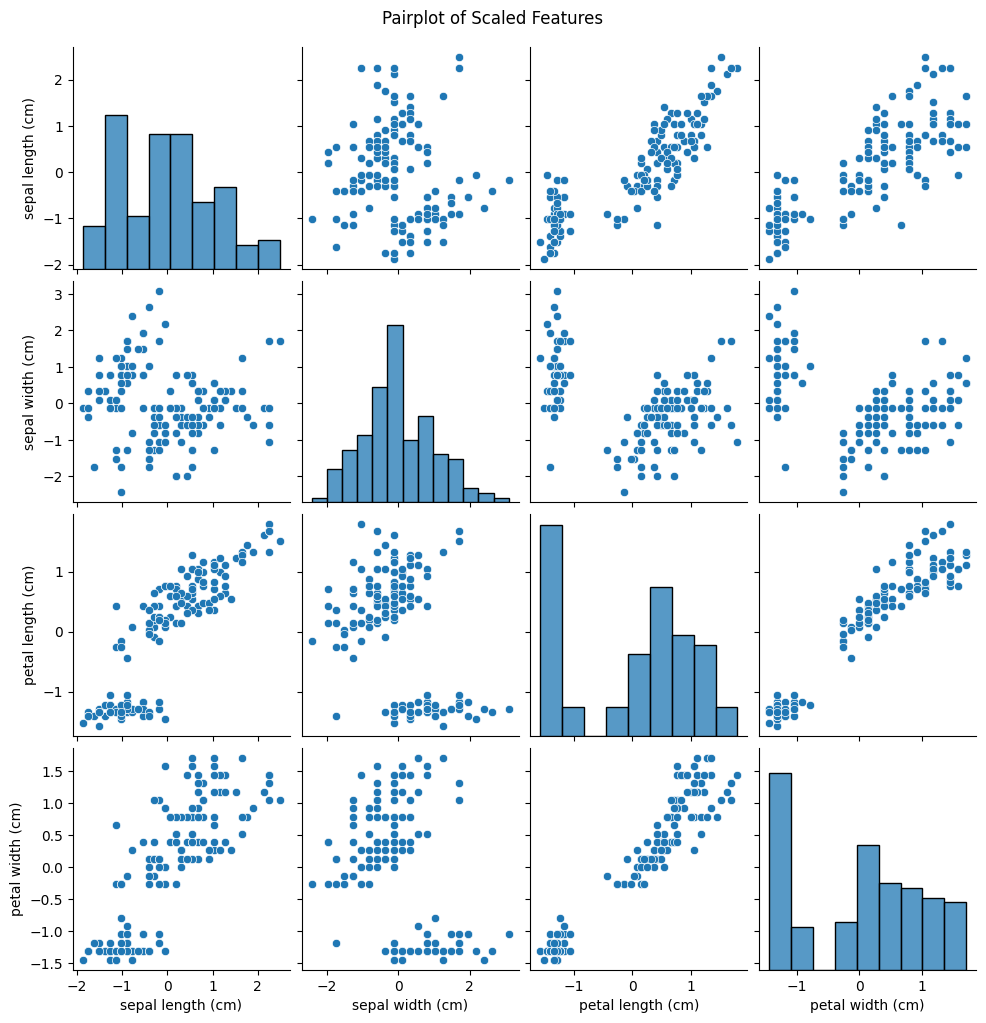

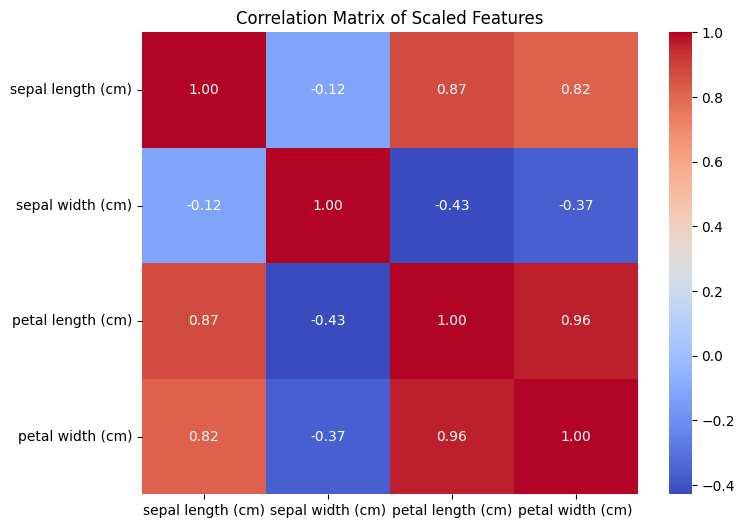

In [4]:
# Plot the distribution of features
sns.pairplot(X_scaled)
plt.suptitle("Pairplot of Scaled Features", y=1.02)
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(X_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Scaled Features")
plt.show()

## Model definition

In [5]:
# Define the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed

# Fit the model to the scaled data
dbscan.fit(X_scaled)

# Get the cluster labels
cluster_labels = dbscan.labels_

# Add cluster labels to the original dataset for visualization
X['Cluster'] = cluster_labels
print("Cluster Labels:")
print(X.head())

# Number of clusters (excluding noise if present)
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Number of clusters: {n_clusters}")

Cluster Labels:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  
Number of clusters: 2


## Model evaulation

Silhouette Score: 0.6559


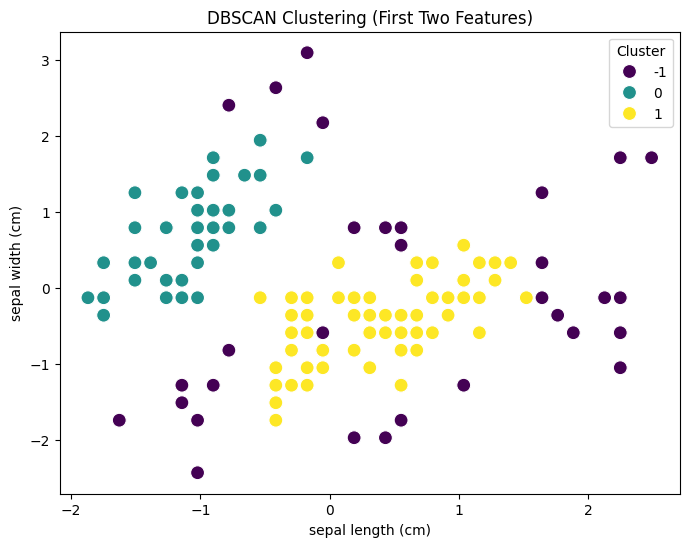

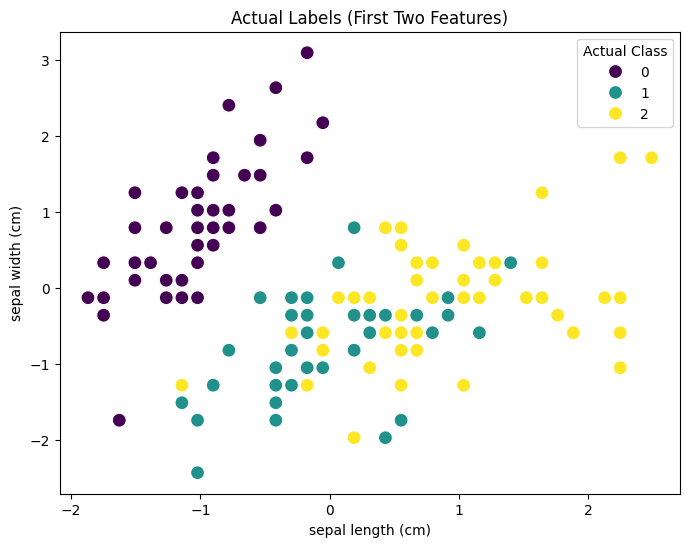

In [6]:
# Evaluate the clustering using Silhouette Score (excluding noise points)
if n_clusters > 1:  # Silhouette Score requires at least 2 clusters
    silhouette_avg = silhouette_score(X_scaled[cluster_labels != -1], cluster_labels[cluster_labels != -1])
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    print("Silhouette Score cannot be computed with only one cluster.")

# Plot the clusters (using the first two features for visualization)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled.iloc[:, 0], y=X_scaled.iloc[:, 1], hue=cluster_labels, palette='viridis', s=100)
plt.title("DBSCAN Clustering (First Two Features)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title='Cluster')
plt.show()

# Compare clusters with actual labels (for visualization purposes only)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled.iloc[:, 0], y=X_scaled.iloc[:, 1], hue=y, palette='viridis', s=100)
plt.title("Actual Labels (First Two Features)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title='Actual Class')
plt.show()